<a href="https://colab.research.google.com/github/koromeng/MLTSA22_KOromeng/blob/main/HW3/HW3_ARIMA_KOromeng.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Homework 3**
Kopo Oromeng

MLTSA_22

3/1/2022

In [1]:
#import necessary modules and packages
import pandas as pd
import numpy as np
import pylab as pl
import glob
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import statsmodels.api as sm
from pandas.plotting import scatter_matrix
import json
import os

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
pl.style.use("https://raw.githubusercontent.com/fedhere/MLTSA22_FBianco/master/fbb.mplstyle")

In [6]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [7]:
# loading HW2 cause that is where the data is, even if this is HW3
%cd /content/drive/MyDrive//MLTSA_22/HW2/Data

/content/drive/MyDrive/MLTSA_22/HW2/Data


In [8]:
!pwd

/content/drive/MyDrive/MLTSA_22/HW2/Data


## Part 1: data ingestion, exploration, preparation (from HW2)
you can start with the HW2 notebook you created or my solution which is in https://github.com/fedhere/MLTSA22_FBianco/tree/main/HW2


In [9]:
ls /content/drive/MyDrive/MLTSA_22/HW2/Data

Data/  ETFs/  price-volume-data-for-all-us-stocks-etfs.zip  Stocks/


In [10]:
alltss = []

#glob lists the files, which is then turned into an array and sorted alphabetically
allfiles = np.sort(np.array(glob.glob("Data/Stocks/*.txt")))[:10] 
tss = pd.read_csv(allfiles[0])[["Date", "Close"]].rename({"Close":
              allfiles[0].replace(".txt",
                                  "").replace("Data/Stocks/", 
                                              "")}, axis=1)
for f in allfiles[1:]:
    print(f)
    name = f.replace(".txt","").replace("Data/Stocks/", "")
    
    tss = tss.merge(pd.read_csv(f)[["Date", "Close"]].rename({"Close":
                                                              name}, 
                                        axis=1), on="Date")
tss.set_index("Date", inplace=True)

Data/Stocks/aa.us.txt
Data/Stocks/aaap.us.txt
Data/Stocks/aaba.us.txt
Data/Stocks/aac.us.txt
Data/Stocks/aal.us.txt
Data/Stocks/aamc.us.txt
Data/Stocks/aame.us.txt
Data/Stocks/aan.us.txt
Data/Stocks/aaoi.us.txt


## testing for stationarity (you did it in HW2 but it will be useful have it here under your eyes)
test if each of these time series is stationary using the AD fuller test using ```statsmodels.api.tsa.stattools.adfuller()```

```for f in tss.columns:
    sm.tsa.stattools.adfuller(tss[c])```

Have the code automatically print a statement about wheather the ts is stationary for each ts (for example in a for loop).

In [11]:
threshold = 0.05
print ("Stationarity results from the AD Fuller test at a p-value of 0.05")
for c in tss.columns:
    print(c, "is stationary:", sm.tsa.stattools.adfuller(tss[c])[1] < threshold)

Stationarity results from the AD Fuller test at a p-value of 0.05
a.us is stationary: False
aa.us is stationary: False
aaap.us is stationary: False
aaba.us is stationary: False
aac.us is stationary: False
aal.us is stationary: False
aamc.us is stationary: False
aame.us is stationary: True
aan.us is stationary: False
aaoi.us is stationary: False


### **1. Question: why did I set the threshold to 0.05? what does 0.05 mean?** 
The threshold represents the statistical significance and the fraction of a gaussian distribution that is not contained inside of 2-sigma.

# 2. Task: measure autocorrelation

Plot the time series and its autocorrelation and partial autocorrelation function in blue if it is not stationary, in red if it is stationary. As a reminder, the plotting function for the autocorrelation and partial autocorelation functions works as follows.

No handles with labels found to put in legend.


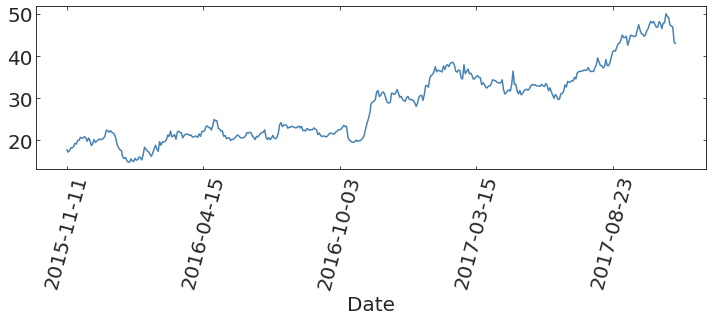

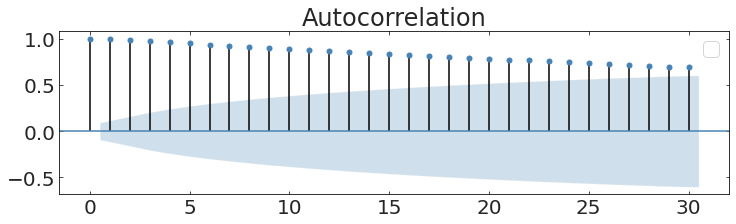

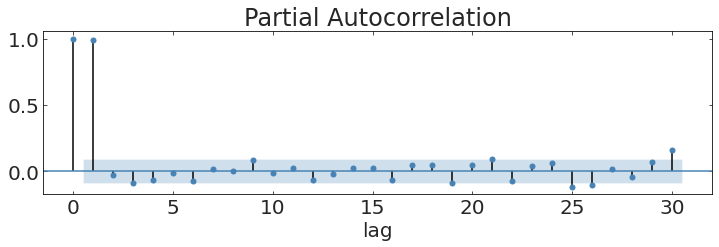

In [82]:
tss["aa.us"].plot(rot=75, figsize=(12,3));
ax = pl.figure(figsize=(12,3)).add_subplot(111)

#Plotting the autocorrelation (ACF)
sm.graphics.tsa.plot_acf(tss["aa.us"], lags=30, ax=ax)
ax = pl.figure(figsize=(12,3)).add_subplot(111)
ax.set_xlabel("")

#plotting the Partial autocorrelation (PAC)
fig = sm.graphics.tsa.plot_pacf(tss["aa.us"], lags=30, ax=ax)
ax.set_xlabel("lag");

**Fig 1:** Plots of time series for closing prices, their autocorrelation and partial autocorrelation for stock aa.us from 2015-2017.

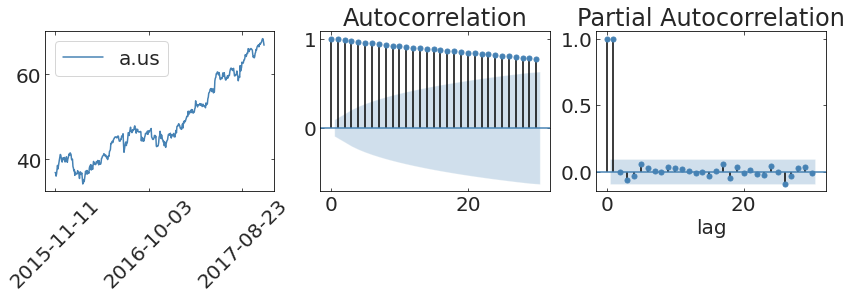

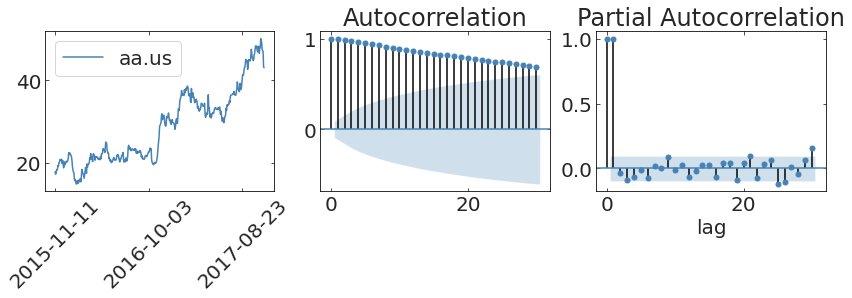

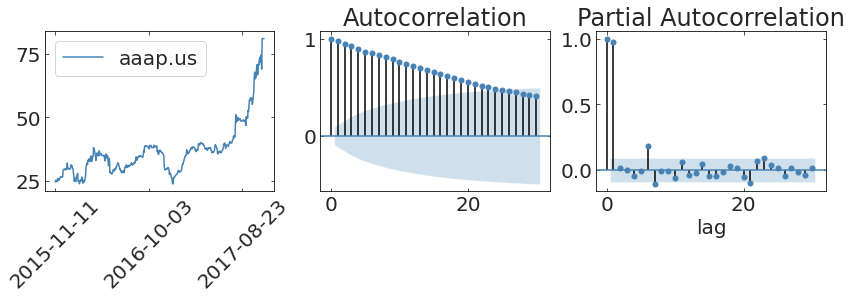

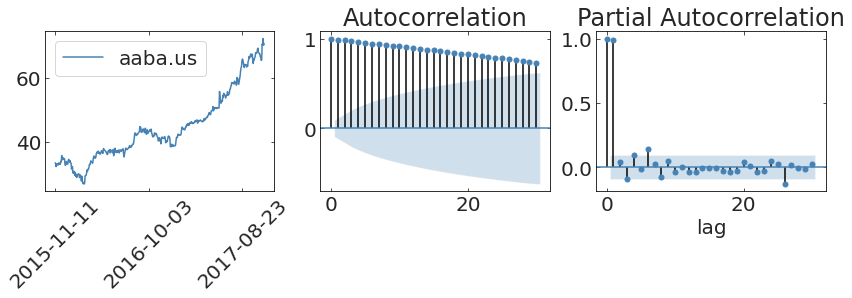

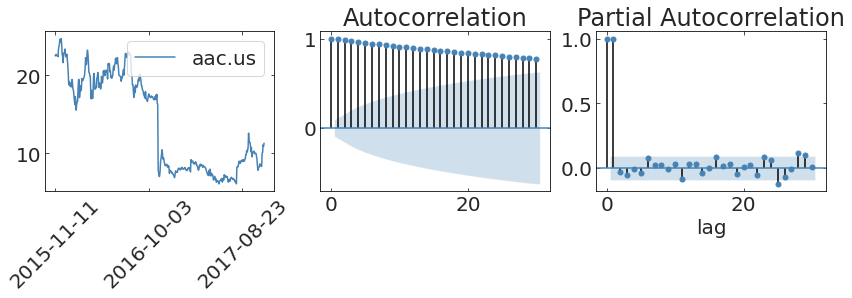

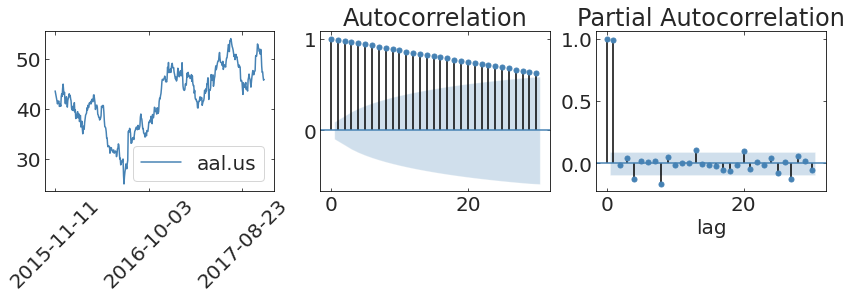

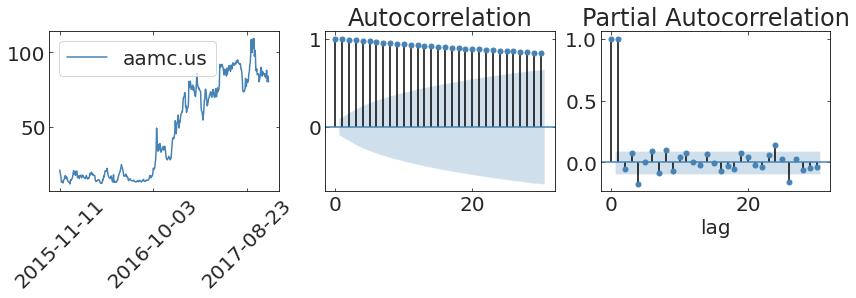

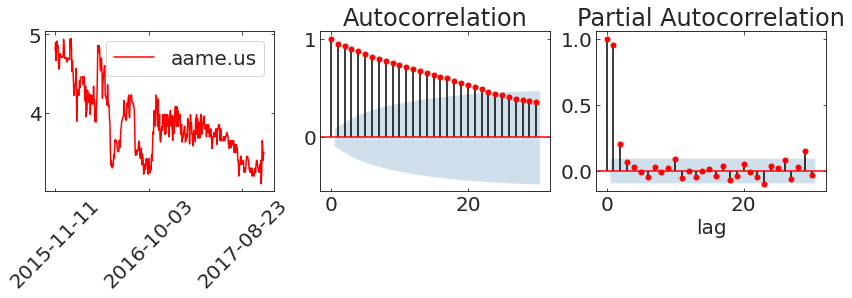

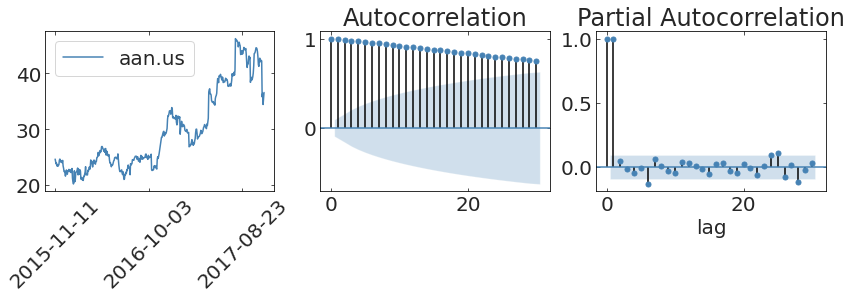

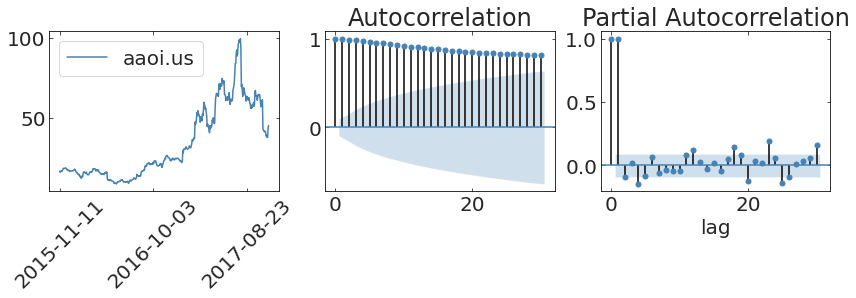

In [18]:
for c in tss.columns:
    if sm.tsa.stattools.adfuller(tss[c])[1] < threshold: 
      fig= plt.figure(figsize=(14,10))
      ax1 = fig.add_subplot(331)
      tss[c].plot(rot=45,color="red", ax=ax1)
      ax1.legend()
      ax1.set_xlabel("")
      #plot the AC
      ax2=fig.add_subplot(332)
      sm.graphics.tsa.plot_acf(tss[c], lags=30, color = "red", ax=ax2)
      ax2.set_xlabel("")
      #plot the PAC
      ax3=fig.add_subplot(333)
      sm.graphics.tsa.plot_pacf(tss[c], lags=30, color = "red", ax=ax3)
      ax3.set_xlabel('lag')
    else:
      fig= plt.figure(figsize=(14,10))
      ax1 = fig.add_subplot(331)
      tss[c].plot(rot=45,ax=ax1)
      ax1.legend()
      ax1.set_xlabel("")
      #plot the AC
      ax2=fig.add_subplot(332)
      sm.graphics.tsa.plot_acf(tss[c], lags=30, ax=ax2)
      ax2.set_xlabel("")
      #plot the PAC
      ax3=fig.add_subplot(333)
      sm.graphics.tsa.plot_pacf(tss[c], lags=30, ax=ax3)
      ax3.set_xlabel('lag')

**Fig 2**: Subplots of stock closing price time series, autocorrelation and partial autocorrelation of the top ten selected stocks. The shaded region of the autocorrelation and partial autocorrelation subplots indicate the uncertainty such that everything that is outside the uncertainty is considered singnificant. 

**3. Question: pick one of the time series (of your choice) and tell me which lags are expected to be significant in the model based on the ACF and PACF plots you made**

**aaap.us** - The ACF shows lag=20 and PACF lag=7 based on Fig 2 above.



## 4. Task: training and testing split
To set up a training and test set for this, remove the last two months of data (60 days) and use it as a test set. Were your predictions good enough to make you rich? Predict 100 days forward of the training set
You do not have to overthink it and create differnt variables, you can simply select data without the last 2 month when you pass the data to the fit function. Here, make a plot of the first time series plotting in blue the training data and in orange the test data.

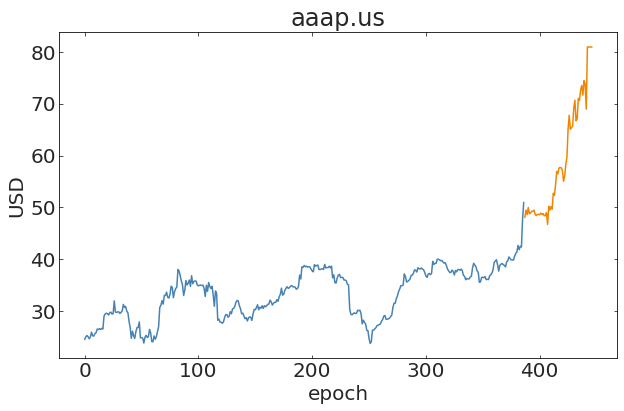

In [92]:
pl.plot(np.arange(tss.shape[0] - 60), tss.loc[:,"aaap.us"][:-60])
pl.plot(np.arange(tss.shape[0] - 60, tss.shape[0]), tss.loc[:,"aaap.us"][-60:]);
pl.title("aaap.us")
pl.xlabel("epoch")
pl.ylabel("USD");

**Fig 3:** A time series plot of closing prices for stock- *aaap*.us showing training data and test data (the last two months of the series).

# Part 2: Model and Forecast
Here we are doing sock price analysis. The most likely reason is that we want to make $$$ - so we want to forecast the future. 

To fit the model to the data use ```statsmodels.api.tsa.ARMA```

You can inspect the function call as ```statsmodels.api.tsa.ARMA?```
The statsmodels models are generally fit into 2 phases: generating the model ```sm.tsa.ARMA(data, parameters)```, and then fitting it ```sm.tsa.ARMA(data, parameters).fit()```. 

To look at the model result, including the AIC,  look at the model summary ```mod.summary()``` What are the best fit parameters based on this printed summary and thewir uncertainties? What is the value of the AIC(Aikiki Information Criterion)

See https://github.com/fedhere/MLTSA22_FBianco/CodeExamples/ARMA/testingARMA_ARIMA.ipynb



In [101]:
modAAN=sm.tsa.ARMA(tss['aan.us'],(1,1)).fit()
modAAN.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                 aan.us   No. Observations:                  447
Model:                     ARMA(1, 1)   Log Likelihood                -533.321
Method:                       css-mle   S.D. of innovations              0.794
Date:                Wed, 02 Mar 2022   AIC                           1074.642
Time:                        17:52:23   BIC                           1091.052
Sample:                             0   HQIC                          1081.111
                                                                              
================================================================================
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const           30.0325      4.491      6.687      0.000      21.230      38.835
ar.L1.aan.us     0.9938      0.004    224.785      0.000       0.985       1.002
ma.L1.aan.us    -0.0258      0.046     -0.561      0.575      -0.116       0.064
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0063           +0.0000j            1.0063            0.0000
MA.1           38.7121           +0.0000j           38.7121            0.0000
-----------------------------------------------------------------------------
"""

# 5. Task: Fit one of the stationary time series with ARMA
a. Fit the model for a variety of parameters. You can run a nested loop to iterate over a range of p and q parameters. 
b. At each loop step record the AIC score for each fit. 
c. Find the best parameters to fit this time series with the AIC minimization criterion. For each model, after you fit it to the data, you can get the value of the AIC as ```model.aic```

In [114]:
#can also use a for-loop check video from class for more ifo
aics=np.zeros((5,5))
for p in range(5):
  for q in range(5):
    try:
      aics[p,q]=sm.tsa.ARMA(tss[['aame.us']][:60],(p,q)).fit().aic
    except:
        aics[p,q]=np.nan

p,q=np.where(aics==np.nanmin(aics))
print('best parameters - aame.us: p: {:d} q: {:d}'.format(p[0],q[0]))

best parameters - aaap.us: p: 1 q: 0


In [104]:
#assessing the ARMA model output for AAME
model11 = sm.tsa.ARMA(tss[['aame.us']], (1,1)).fit()
model11.summary() #this retrieves the summary of the whole model

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                aame.us   No. Observations:                  447
Model:                     ARMA(1, 1)   Log Likelihood                 301.057
Method:                       css-mle   S.D. of innovations              0.123
Date:                Wed, 02 Mar 2022   AIC                           -594.115
Time:                        17:57:21   BIC                           -577.705
Sample:                             0   HQIC                          -587.645
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.9275      0.204     19.247      0.000       3.528       4.327
ar.L1.aame.us     0.9811      0.010    100.057      0.000       0.962       1.000
ma.L1.aame.us    -0.2706      0.049     -5.576      0.000      -0.366      -0.175
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0192           +0.0000j            1.0192            0.0000
MA.1            3.6958           +0.0000j            3.6958            0.0000
-----------------------------------------------------------------------------
"""

In [105]:
model11.aic #which is a variable inside method

-594.1149218798466

## 6. Task: predict the in-set (training) and the future alues

you can use ```mod.plot_predict()``` to generate and visualize the prediction at once

In [121]:
aics=np.zeros((5,5))
for p in range(5):
  for q in range(5):
    try:
      aics[p,q]=sm.tsa.ARMA(tss[['aaap.us']][:60],(p,q)).fit().aic
    except:
        aics[p,q]=np.nan

p,q=np.where(aics==np.nanmin(aics))
print('best parameters - aaap.us: p: {:d} q: {:d}'.format(p[0],q[0]))

best parameters - aaap.us: p: 1 q: 0


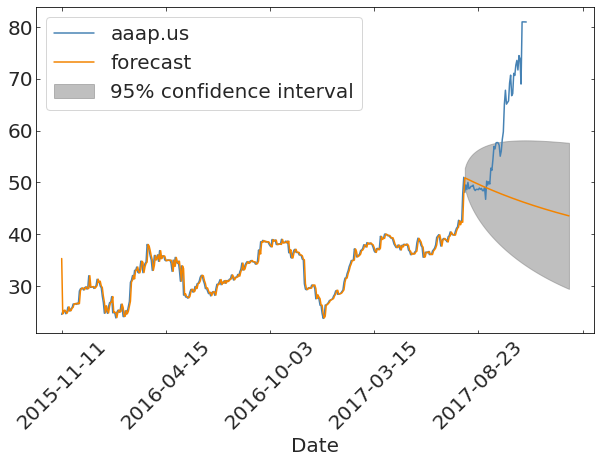

In [122]:
N = tss[['aaap.us']].shape[0] #the length of the data
ax = tss[['aaap.us']].plot()
mod=sm.tsa.ARMA(tss['aaap.us'][0:-60], (1,0)).fit() #using ARMA and best parameters from above
mod.plot_predict(end=N+40, plot_insample=False, ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=45);

**Fig 4:** A time series plot of closing prices for stock- *aaap.us* showing forecasted/predicted closing prices in orange and actual prices in blue. Prediction was based on an in-set sample of training data from the last two months of the time series.

### **7. Question: Did you make money??**
I don't think I made any money given how far my forecast was from the actual closing prices.

### **8. Question: what are the coefficients of the best fit model? what do they mean?**
My model had two coefficients (const and L1) and they both had very small p-values. I think they mean that the model for stock aaap is pretty simple, it seems as if it's a linear model with a slope that is near 1 and an intercept of 35USD. This might imply that this is a pretty predictable stock. 

In [123]:
mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              ARMA Model Results                              
==============================================================================
Dep. Variable:                aaap.us   No. Observations:                  387
Model:                     ARMA(1, 0)   Log Likelihood                -532.382
Method:                       css-mle   S.D. of innovations              0.952
Date:                Wed, 02 Mar 2022   AIC                           1070.764
Time:                        18:11:45   BIC                           1082.639
Sample:                             0   HQIC                          1075.473
                                                                              
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            35.2851      5.783      6.102      0.000      23.952      46.619
ar.L1.aaap.us     0.9936      0.007    149.726      0.000       0.981       1.007
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1            1.0064           +0.0000j            1.0064            0.0000
-----------------------------------------------------------------------------
"""

##  9. Task: choose 2 non stationary time series in the set that are not correlated and repeat Tasks 5 amd 6 with the ARIMA model

choose integration 1 to start ...

In [67]:
#First series - AAOI
aics=np.zeros((5,5))
for p in range(5):
  for q in range(5):
    try:
      aics[p,q]=sm.tsa.ARIMA(tss[['aaba.us']][:60],(p,1,q)).fit().aic
    except:
        aics[p,q]=np.nan
  
p,q=np.where(aics==np.nanmin(aics))
print('best parameters - aaba.us: p: {:d} q: {:d}'.format(p[0],q[0]))

best parameters - aaba.us: p: 0 q: 4


In [51]:
#Second series - AAL
aics=np.zeros((5,5))
for p in range(5):
  for q in range(5):
    try:
      aics[p,q]=sm.tsa.ARIMA(tss[['aal.us']][:60],(p,1,q)).fit().aic
    except:
        aics[p,q]=np.nan
  
p,q=np.where(aics==np.nanmin(aics))
print('best parameters - aal.us: p: {:d} q: {:d}'.format(p[0],q[0]))

best parameters- aal.us: p: 3 q: 0


Text(0.5, 0, '')

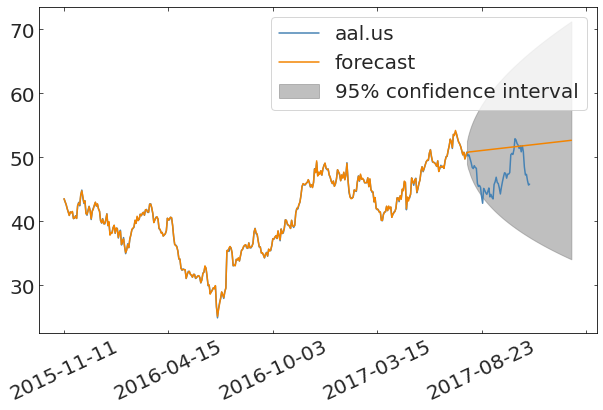

In [71]:
N=tss['aal.us'].shape[0]
ax = tss["aal.us"].plot()
mod=sm.tsa.ARIMA(tss['aal.us'][0:-60],(3,1,0)).fit()
mod.plot_predict(end=N+40,plot_insample=False, ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=25);
ax.set_xlabel('')
#tss[timeseries[1]].plot(ax=ax)

**Fig 5a:** A time series plot of closing prices for stock- *aal.us* showing forecasted/predicted closing prices in orange and actual prices in blue. Prediction was based on an in-set sample of training data from the last two months of the time series.

Text(0.5, 0, '')

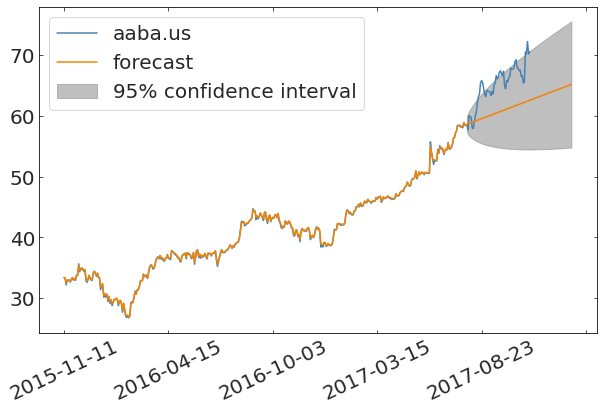

In [72]:
N=tss['aaba.us'].shape[0]
ax = tss["aaba.us"].plot()
mod=sm.tsa.ARIMA(tss['aaba.us'][0:-60],(0,1,4)).fit()
mod.plot_predict(end=N+40,plot_insample=False, ax=ax);
ax.set_xticklabels(ax.get_xticklabels(), rotation=25);
ax.set_xlabel('')
#tss[timeseries[1]].plot(ax=ax)

**Fig 5b:** A time series plot of closing prices for stock- *aaba.us* showing forecasted/predicted closing prices in orange and actual prices in blue. Prediction was based on an in-set sample of training data from the last two months of the time series.

### **10. Question: Did you get rich?**
I am actually very unsure how to read these graphs. Are we assuming that I already hold the stocks plotted above or I am using the predictions to decide whether to buy or not? If it's the former, then I will continue to make money (more money than forecasted) off of aaba but might lose money from stock aal.

### 11 Task: Redo the fit to one of the non-stationary lightcurves with a different order of integration and compare the results. What do the coefficients tell you?

In [78]:
mod124_aaba=sm.tsa.ARIMA(
  tss[['aaba.us']],(1,2,4)).fit()

mod124_aaba.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:             D2.aaba.us   No. Observations:                  445
Model:                 ARIMA(1, 2, 4)   Log Likelihood                -505.732
Method:                       css-mle   S.D. of innovations              0.748
Date:                Wed, 02 Mar 2022   AIC                           1025.463
Time:                        16:54:16   BIC                           1054.150
Sample:                             2   HQIC                          1036.775
                                                                              
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.0005      0.000      2.268      0.024    6.31e-05       0.001
ar.L1.D2.aaba.us    -0.3460      0.303     -1.143      0.254      -0.939       0.247
ma.L1.D2.aaba.us    -0.7976      0.303     -2.636      0.009      -1.391      -0.205
ma.L2.D2.aaba.us    -0.2620      0.342     -0.766      0.444      -0.933       0.409
ma.L3.D2.aaba.us    -0.0858      0.073     -1.175      0.241      -0.229       0.057
ma.L4.D2.aaba.us     0.1455      0.051      2.855      0.005       0.046       0.245
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -2.8904           +0.0000j            2.8904            0.5000
MA.1           -1.2056           -1.4075j            1.8533           -0.3627
MA.2           -1.2056           +1.4075j            1.8533            0.3627
MA.3            1.0000           -0.0000j            1.0000           -0.0000
MA.4            2.0014           -0.0000j            2.0014           -0.0000
-----------------------------------------------------------------------------
"""

In [79]:
mod014_aaba=sm.tsa.ARIMA(
  tss[['aaba.us']],(0,1,4)).fit()

mod014_aaba.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:              D.aaba.us   No. Observations:                  446
Model:                 ARIMA(0, 1, 4)   Log Likelihood                -505.747
Method:                       css-mle   S.D. of innovations              0.752
Date:                Wed, 02 Mar 2022   AIC                           1023.494
Time:                        16:55:12   BIC                           1048.096
Sample:                             1   HQIC                          1033.194
                                                                              
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0835      0.027      3.038      0.003       0.030       0.137
ma.L1.D.aaba.us    -0.1320      0.047     -2.794      0.005      -0.225      -0.039
ma.L2.D.aaba.us    -0.0034      0.047     -0.071      0.943      -0.096       0.089
ma.L3.D.aaba.us    -0.1292      0.049     -2.638      0.009      -0.225      -0.033
ma.L4.D.aaba.us     0.0360      0.049      0.733      0.464      -0.060       0.132
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
MA.1           -1.0216           -1.5723j            1.8751           -0.3417
MA.2           -1.0216           +1.5723j            1.8751            0.3417
MA.3            2.6387           -0.0000j            2.6387           -0.0000
MA.4            2.9926           -0.0000j            2.9926           -0.0000
-----------------------------------------------------------------------------
"""